In [1]:
## This cell ensures that all libraries are imported
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt 


In [5]:
## First we need to load the cleaned data
file = pd.read_csv("../SpotifyData/final_data.csv")
print(file.head())
print(file.info())

                         title  rank        date  \
0      Chantaje (feat. Maluma)     1  2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2   Reggaetón Lento (Bailemos)     3  2017-01-01   
3                       Safari     4  2017-01-01   
4                  Shaky Shaky     5  2017-01-01   

                                  artist     region  chart  trend  popularity  \
0                                Shakira  Argentina      2      0        78.0   
1                           Ricky Martin  Argentina      2      1        72.0   
2                                   CNCO  Argentina      2     -1        73.0   
3  J Balvin, Pharrell Williams, BIA, Sky  Argentina      2      0         0.0   
4                           Daddy Yankee  Argentina      2      1         0.0   

   af_danceability  af_energy  af_key  af_loudness  af_mode  af_speechiness  \
0            0.852      0.773     8.0       -2.921      0.0          0.0776   
1            0.663      0.920    11.0     

In [6]:
## We need to do one more thing to setup the data for kmeans clustering. 
## We need to normalize the af columns so that they do not outweigh one another
normalized = preprocessing.normalize(file[["af_danceability", "af_energy", "af_key", "af_loudness", "af_mode", "af_speechiness", "af_acousticness", "af_instrumentalness","af_liveness", "af_valence", "af_tempo", "af_time_signature"]])

In [7]:
## Testing kmeans of 2
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(normalized)
# file["2clusters"] = kmeans.labels_
# print(file.head(20))

In [8]:
## Here we need to do kmeans clustering on the af features. We will test 2-14 clusters to see how well each of them do.
inertias = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normalized)
    inertias.append(kmeans.inertia_)
    file[str(i) + "clusters"] = kmeans.labels_

                         title  rank        date  \
0      Chantaje (feat. Maluma)     1  2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2   Reggaetón Lento (Bailemos)     3  2017-01-01   
3                       Safari     4  2017-01-01   
4                  Shaky Shaky     5  2017-01-01   
5                  Traicionera     6  2017-01-01   
6      Cuando Se Pone a Bailar     7  2017-01-01   
7    Otra vez (feat. J Balvin)     8  2017-01-01   
8                 La Bicicleta     9  2017-01-01   
9       Dile Que Tu Me Quieres    10  2017-01-01   

                                  artist     region  chart  trend  popularity  \
0                                Shakira  Argentina      2      0        78.0   
1                           Ricky Martin  Argentina      2      1        72.0   
2                                   CNCO  Argentina      2     -1        73.0   
3  J Balvin, Pharrell Williams, BIA, Sky  Argentina      2      0         0.0   
4                     

<Axes: >

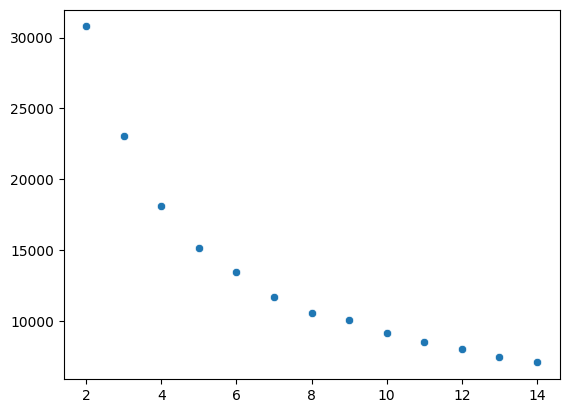

In [9]:
## Checking the kmeans clusters for inertia and proper adding to df
print(file.head(10))

sns.scatterplot(x = [2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14], y = inertias)

In [10]:
## My intuition says that choosing a k around 6 would be a good balance between inteligible clusters. 
## However, I'm going to look at lists of the songs to see if there are similarities to the eye.

for i in range(2,15):
    print(" ")
    print(str(i) + " Clusters:")
    for j in range(i):
        print("Cluster " +  str(j) +":")
        print(file[file["region"] == "United States"].groupby(str(i) + "clusters").get_group(j).head(10)[["title", "artist"]].to_markdown())

 
2 Clusters:
Cluster 0:
|      | title                                   | artist                   |
|-----:|:----------------------------------------|:-------------------------|
| 8246 | Bad and Boujee (feat. Lil Uzi Vert)     | Migos                    |
| 8247 | Fake Love                               | Drake                    |
| 8249 | Closer                                  | The Chainsmokers, Halsey |
| 8251 | Broccoli (feat. Lil Yachty)             | Shelley FKA DRAM         |
| 8253 | Caroline                                | Aminé                    |
| 8261 | Don't Wanna Know                        | Maroon 5, Kendrick Lamar |
| 8262 | Chill Bill (feat. J. Davi$ & Spooks)    | Rob $tone                |
| 8263 | Deja Vu                                 | J. Cole                  |
| 8266 | No Problem (feat. Lil Wayne & 2 Chainz) | Chance the Rapper        |
| 8269 | Don't Let Me Down (feat. Daya)          | The Chainsmokers         |
Cluster 1:
|      | title              

In [11]:
## I realize that I am relatively unaware of most of these songs so I cannot analyze if these songs fit into groups well.
## While some people would be able to do this better I do not bave the time to educate myself on these songs. 
## That said, I am going to go with a k of 5 based on the elbow of the inertia chart. 
## If someone knew the songs better they could use the above songs to analyze the clusters.
clustered_file = file.drop(["2clusters", "3clusters", "4clusters", "6clusters", "7clusters", "8clusters", "9clusters", "10clusters", "11clusters", "12clusters", "13clusters", "14clusters"], axis=1)
print(clustered_file.head().to_markdown())

|    | title                       |   rank | date       | artist                                | region    |   chart |   trend |   popularity |   af_danceability |   af_energy |   af_key |   af_loudness |   af_mode |   af_speechiness |   af_acousticness |   af_instrumentalness |   af_liveness |   af_valence |   af_tempo |   af_time_signature |   5clusters |
|---:|:----------------------------|-------:|:-----------|:--------------------------------------|:----------|--------:|--------:|-------------:|------------------:|------------:|---------:|--------------:|----------:|-----------------:|------------------:|----------------------:|--------------:|-------------:|-----------:|--------------------:|------------:|
|  0 | Chantaje (feat. Maluma)     |      1 | 2017-01-01 | Shakira                               | Argentina |       2 |       0 |           78 |             0.852 |       0.773 |        8 |        -2.921 |         0 |           0.0776 |           0.187   |              3.05e

In [23]:
## We will now store the clustered file in a csv
clustered_file.to_csv("../SpotifyData/clustered_data.csv", index=False)

In [2]:
## This cell loads the data in if it is not already
clustered_file = pd.read_csv("../SpotifyData/clustered_data.csv")

### Country Analysis

In [12]:
## Now we can begin analysis based on the clusters. Firstly, we are going to see which clusters are popular in which areas of the world.

country_object = clustered_file.groupby("region")
countries = file["region"].unique()
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
max_cluster = []
for country in countries:
    counts = []
    cluster_object = country_object.get_group(country).groupby("5clusters")
    count0 = cluster_object.get_group(0)["title"].count()
    c0.append(count0)
    counts.append(count0)
    count1 = cluster_object.get_group(1)["title"].count()
    c1.append(count1)
    counts.append(count1)
    count2 = cluster_object.get_group(2)["title"].count()
    c2.append(count2)
    counts.append(count2)
    count3 = cluster_object.get_group(3)["title"].count()
    c3.append(count3)
    counts.append(count3)
    count4 = cluster_object.get_group(4)["title"].count()
    c4.append(count4)
    counts.append(count4)
    maximum = 0
    for i in range(5):
        if maximum < counts[i]:
            dominant = i
            maximum = counts[i]
    max_cluster.append(dominant)


In [13]:
## This cell tests to see i we have properly split up the values for the clusters and also correctly identified the dominant cluster
print(countries[60] + " C0: " + str(c0[60]) + " C1: " + str(c1[60]) + " C2: " + str(c2[60]) + " C3: " + str(c3[60]) + " C4: " + str(c4[60]) + " Dominant Cluster: " + str(max_cluster[60]))



Egypt C0: 43303 C1: 33508 C2: 33702 C3: 49037 C4: 18955 Dominant Cluster: 3


In [14]:
## This cell analyzes what clusters have more of a market share overall by number of countries as well as by volume.
countries_dominated = []
total_occurances = []
clust = file["5clusters"].tolist()
for i in range(5):
    countries_dominated.append(max_cluster.count(i))
    total_occurances.append(clust.count(i))
print("Countries Dominated by Each Cluster: ")
print("C0: " + str(countries_dominated[0]) + " C1: " + str(countries_dominated[1]) + " C2: " + str(countries_dominated[2]) + " C3: " + str(countries_dominated[3]) + " C4: " + str(countries_dominated[4]))
print("Total Instances of Each Cluster: ")
print("C0: " + str(total_occurances[0]) + " C1: " + str(total_occurances[1]) + " C2: " + str(total_occurances[2]) + " C3: " + str(total_occurances[3]) + " C4: " + str(total_occurances[4]))

Countries Dominated by Each Cluster: 
C0: 10 C1: 0 C2: 0 C3: 60 C4: 0
Total Instances of Each Cluster: 
C0: 7256741 C1: 5437793 C2: 3551916 C3: 7894744 C4: 1728795


[Text(0.5, 1.0, 'Occurances of Each Cluster')]

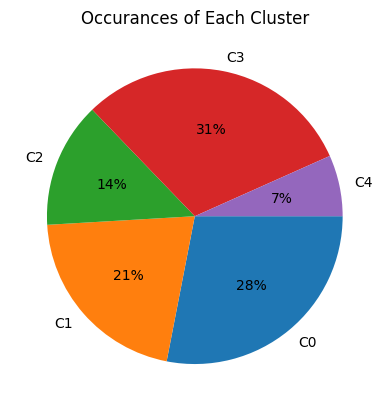

In [15]:
## The above info tells us that the songs primarily on these lists are cluster 0 and 3. This pie chart shows the overall occurances
fig, ax = plt.subplots()
ax.pie(total_occurances, labels=["C0", "C1", "C2", "C3", "C4"], autopct='%.0f%%', counterclock=False) 
ax.set(title="Occurances of Each Cluster")

[Text(0.5, 1.0, 'Countries Dominated')]

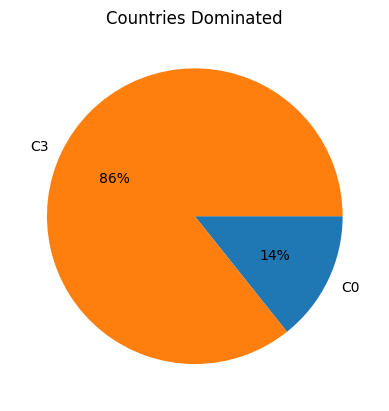

In [17]:
## This pie chart shows the number of countries where a type dominates
fig, ax = plt.subplots()
ax.pie([countries_dominated[0], countries_dominated[3]], labels=["C0", "C3"], autopct='%.0f%%', counterclock=False) 
ax.set(title="Countries Dominated")

In [18]:
## This is the list of regions that are dominated by cluster 0. All are Latin American countries!
## This shows that if you want to make a song that is popular within Latin America especially you can mimic cluster 0.
## Otherwise cluster C3 is your safest bet for a global approach.
mask = pd.Series(max_cluster)
series = pd.Series(countries)
print(series[mask == 0])

0              Argentina
5               Colombia
6                Bolivia
10                 Chile
14    Dominican Republic
15               Ecuador
16           El Salvador
40                Panama
41              Paraguay
55               Uruguay
dtype: object


### Chart Analysis

In [19]:
## Now we move into analysis of the charts
chart_object = clustered_file.groupby("chart")
charts = [2, 5]
cc0 = []
cc1 = []
cc2 = []
cc3 = []
cc4 = []
max_cluster_chart = []
for chart in charts:
    counts = []
    cluster_object = chart_object.get_group(chart).groupby("5clusters")
    count0 = cluster_object.get_group(0)["title"].count()
    cc0.append(count0)
    counts.append(count0)
    count1 = cluster_object.get_group(1)["title"].count()
    cc1.append(count1)
    counts.append(count1)
    count2 = cluster_object.get_group(2)["title"].count()
    cc2.append(count2)
    counts.append(count2)
    count3 = cluster_object.get_group(3)["title"].count()
    cc3.append(count3)
    counts.append(count3)
    count4 = cluster_object.get_group(4)["title"].count()
    cc4.append(count4)
    counts.append(count4)
    maximum = 0
    for i in range(5):
        if maximum < counts[i]:
            dominant = i
            maximum = counts[i]
    max_cluster_chart.append(dominant)


In [20]:
print("Top 200:")
print("C0: " + str(cc0[0]) + " C1: " + str(cc1[0]) + " C2: " + str(cc2[0]) + " C3: " + str(cc3[0]) + " C4: " + str(cc4[0]) + " Dominant Cluster: " + str(max_cluster_chart[0]))
print("")
print("Viral 50:")
print("C0: " + str(cc0[1]) + " C1: " + str(cc1[1]) + " C2: " + str(cc2[1]) + " C3: " + str(cc3[1]) + " C4: " + str(cc4[1]) + " Dominant Cluster: " + str(max_cluster_chart[1]))

Top 200:
C0: 5811397 C1: 4375030 C2: 2660878 C3: 6205012 C4: 1266597 Dominant Cluster: 3

Viral 50:
C0: 1445344 C1: 1062763 C2: 891038 C3: 1689732 C4: 462198 Dominant Cluster: 3


[Text(0.5, 1.0, 'Top 200 Cluster Breakdown')]

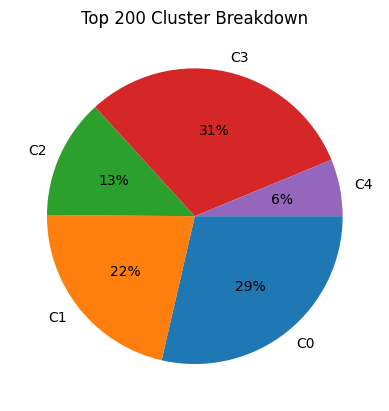

In [21]:
## Plot for the Top 200 cluster breakdown
fig, ax = plt.subplots()
ax.pie([cc0[0], cc1[0], cc2[0], cc3[0], cc4[0]], labels=["C0", "C1", "C2", "C3", "C4"], autopct='%.0f%%', counterclock=False) 
ax.set(title="Top 200 Cluster Breakdown")

[Text(0.5, 1.0, 'Viral 50 Cluster Breakdown')]

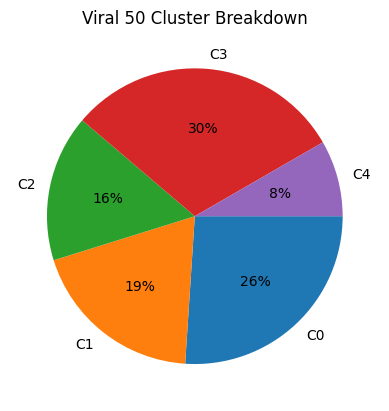

In [22]:
## Plot for the viral 50 cluster breakdown
fig, ax = plt.subplots()
ax.pie([cc0[1], cc1[1], cc2[1], cc3[1], cc4[1]], labels=["C0", "C1", "C2", "C3", "C4"], autopct='%.0f%%', counterclock=False)
ax.set(title="Viral 50 Cluster Breakdown")

In [ ]:
## Conclusions from these charts show that there isn't much difference between the Viral 50 and Top 200 charts as the clusters go.
## This shows that there isn't an incredible difference between songs with sustained popularity vs. more faddy songs.

## Popularity Analysis

In [24]:
## Here we are going to look at the average popularity of each cluster to see if there is any correlation between how popular an artist is and the types of songs they write
print(clustered_file[["5clusters", "popularity"]].groupby("5clusters").mean()["popularity"])


5clusters
0    47.587075
1    47.389988
2    45.872491
3    45.893965
4    46.007734
Name: popularity, dtype: float64


[Text(0.5, 1.0, 'Popularity vs. Cluster'),
 Text(0.5, 0, 'Cluster'),
 Text(0, 0.5, 'Popularity')]

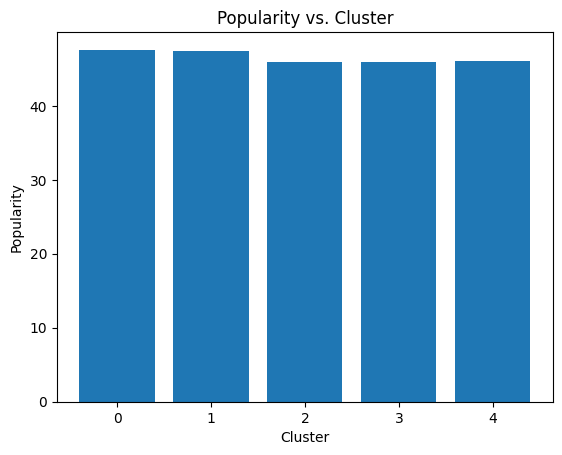

In [28]:
# This cell displays the findings above
fig, ax = plt.subplots()
ax.bar([0, 1, 2, 3, 4], clustered_file[["5clusters", "popularity"]].groupby("5clusters").mean()["popularity"])
ax.set(title="Popularity vs. Cluster", xlabel="Cluster", ylabel="Popularity")

## Trend Analysis

In [6]:
## Here we are going to look at the average trend of each cluster. 
## An average trend that is positive means that it took more weeks to rise up the chart then to fall off.
print(clustered_file[["5clusters", "trend"]].groupby("5clusters").count()["trend"])
print(clustered_file[["5clusters", "trend"]].groupby("5clusters").mean()["trend"])
print(clustered_file[["5clusters", "trend"]].groupby("5clusters").get_group(0).groupby("trend").count())
print(clustered_file[["5clusters", "trend"]].groupby("5clusters").get_group(1).groupby("trend").count())
print(clustered_file[["5clusters", "trend"]].groupby("5clusters").get_group(2).groupby("trend").count())
print(clustered_file[["5clusters", "trend"]].groupby("5clusters").get_group(3).groupby("trend").count())
print(clustered_file[["5clusters", "trend"]].groupby("5clusters").get_group(4).groupby("trend").count())

5clusters
0    7256741
1    5437793
2    3551916
3    7894744
4    1728795
Name: trend, dtype: int64
5clusters
0    0.012215
1    0.011752
2    0.022968
3    0.014872
4    0.034478
Name: trend, dtype: float64
       5clusters
trend           
-1       3118164
 0        931772
 1       3206805
       5clusters
trend           
-1       2335172
 0        703546
 1       2399075
       5clusters
trend           
-1       1530651
 0        409034
 1       1612231
       5clusters
trend           
-1       3381004
 0       1015328
 1       3498412
       5clusters
trend           
-1        737965
 0        193259
 1        797571


[Text(0.5, 1.0, 'Avg Trend vs. Cluster'),
 Text(0.5, 0, 'Cluster'),
 Text(0, 0.5, 'Avg Trend')]

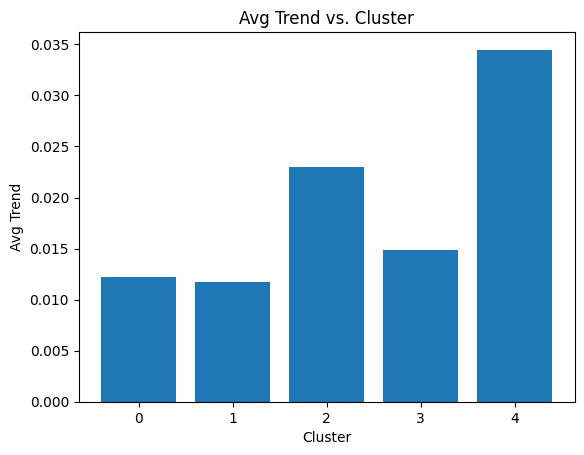

In [9]:
# This cell displays the findings above
fig, ax = plt.subplots()
ax.bar([0, 1, 2, 3, 4], clustered_file[["5clusters", "trend"]].groupby("5clusters").mean()["trend"])
ax.set(title="Avg Trend vs. Cluster", xlabel="Cluster", ylabel="Avg Trend")

## Artist Analysis

In [38]:
## We are gonna look at the 50 most popular artists to see what clusters they typically fall into
top_50_artists = clustered_file[["artist", "5clusters"]].groupby("artist").count().sort_values("5clusters", ascending=False).index[0:50].tolist()
top_50_artists_file = clustered_file[(clustered_file["artist"].isin(top_50_artists))]

top_50_artists_clusters = top_50_artists_file[["title", "5clusters"]].groupby("5clusters").count()
print(top_50_artists_clusters)

             title
5clusters         
0          1619349
1          1132079
2           743313
3          1507080
4           370615


[Text(0.5, 1.0, 'Top 50 Artists Cluster Breakdown')]

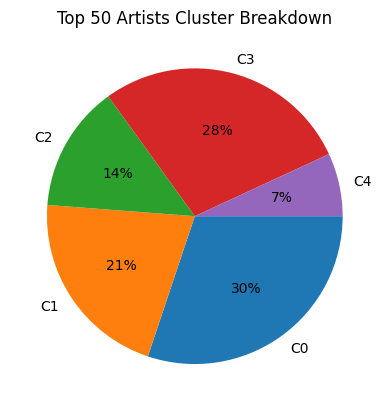

In [40]:
## Plot for the top 50 artists cluster breakdown. Interestingly, the top artists seem to vary in the type of songs that they make.
fig, ax = plt.subplots()
ax.pie(top_50_artists_clusters["title"].tolist(), labels=["C0", "C1", "C2", "C3", "C4"], autopct='%.0f%%', counterclock=False)
ax.set(title="Top 50 Artists Cluster Breakdown")

## Rank Analysis

In [41]:
## Now we are going to do an analysis of the rankings. We are going to see if the top of the charts are dominated by a certain cluster.
## We are going to take the top 10 songs from each chart

ten = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
top_10_file = clustered_file[(clustered_file["rank"].isin(ten))]

top_10_clusters = top_10_file[["title", "5clusters"]].groupby("5clusters").count()
print(top_50_artists_clusters)

             title
5clusters         
0          1619349
1          1132079
2           743313
3          1507080
4           370615


[Text(0.5, 1.0, 'Top 10 Cluster Breakdown')]

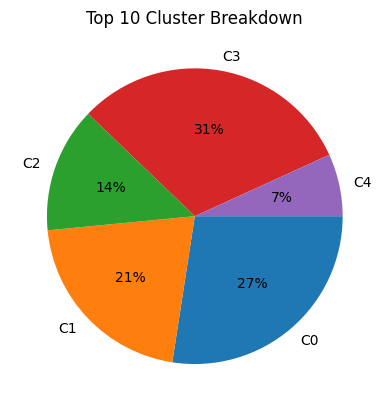

In [43]:
## Plot for the top 10 cluster breakdown. Interestingly, the top songs seem to vary in the song types that they make.
fig, ax = plt.subplots()
ax.pie(top_10_clusters["title"].tolist(), labels=["C0", "C1", "C2", "C3", "C4"], autopct='%.0f%%', counterclock=False)
ax.set(title="Top 10 Cluster Breakdown")

## Showing What Each Cluster Is Like

In [6]:
## This shows five examples from each cluster for users to see what each cluster is defined by
print("5 Clusters:")
for i in range(5):
    print("Cluster " +  str(i) +":")
    print(clustered_file[clustered_file["region"] == "United States"].groupby("5clusters").get_group(i).head(5)[["title", "artist"]].to_markdown())

5 Clusters:
Cluster 0:
|      | title                            | artist                   |
|-----:|:---------------------------------|:-------------------------|
| 8250 | Black Beatles                    | Rae Sremmurd, Gucci Mane |
| 8252 | One Dance                        | Drake, WizKid, Kyla      |
| 8256 | I Feel It Coming                 | The Weeknd, Daft Punk    |
| 8257 | 24K Magic                        | Bruno Mars               |
| 8258 | Bad Things (with Camila Cabello) | Machine Gun Kelly        |
Cluster 1:
|      | title                                   | artist                   |
|-----:|:----------------------------------------|:-------------------------|
| 8246 | Bad and Boujee (feat. Lil Uzi Vert)     | Migos                    |
| 8247 | Fake Love                               | Drake                    |
| 8249 | Closer                                  | The Chainsmokers, Halsey |
| 8261 | Don't Wanna Know                        | Maroon 5, Kendrick Lamar |
|

In [8]:
## This will show the averages of each af trait in each cluster so that clustered can be described by more concrete information rather than jut by example.
print(clustered_file[["5clusters", "af_danceability", "af_energy", "af_key", "af_loudness", "af_mode", "af_speechiness", "af_acousticness", "af_instrumentalness", "af_liveness", "af_valence", "af_tempo", "af_time_signature"]].groupby("5clusters").mean().to_markdown())

|   5clusters |   af_danceability |   af_energy |   af_key |   af_loudness |   af_mode |   af_speechiness |   af_acousticness |   af_instrumentalness |   af_liveness |   af_valence |   af_tempo |   af_time_signature |
|------------:|------------------:|------------:|---------:|--------------:|----------:|-----------------:|------------------:|----------------------:|--------------:|-------------:|-----------:|--------------------:|
|           0 |          0.686085 |    0.692992 |  1.41752 |      -5.21836 |  0.653873 |         0.107761 |          0.212659 |            0.00843946 |      0.168638 |     0.54673  |   133.688  |             3.97911 |
|           1 |          0.71484  |    0.671497 |  9.36255 |      -5.66475 |  0.490027 |         0.104119 |          0.220092 |            0.00685636 |      0.16768  |     0.549332 |   105.509  |             3.9814  |
|           2 |          0.668556 |    0.501117 |  2.26322 |      -8.91202 |  0.626223 |         0.114764 |          0.381778 | 